# Project 8: Machine Learning for Predictive Analytics

### **Project : Reducing monthly churn by identifying high risk customers well in advance**


## **About the Project:**
The project relates to applying predictive analytics on customer churn. A major telecom company’s postpaid business of voice-only plans is struggling to maintain its strong foothold in local market because of:

- High churn rate amongst customers leading to a revenue decline of ~500k USD every month
- Decline in overall customer base (high churn rate combined with low acquisition rate), leading to a decline in total market share



**Aim:** 

1. Build a classification model to predict churners one month in advance
2. Identify key churn drivers

**Hypothesis:** Company CEO believes that existing models can predict churners precisely, but it’s too late to take any retention actions, as customer usage has significantly declined by then


## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv("C:/Users/Princy/Downloads/Telecom Data - Machine Learning/Telecom Data - Machine Learning/Telecom Data.csv")

## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape




(51047, 58)

In [4]:
cust_df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [5]:
cust_df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [6]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
cust_df = cust_df[cust_df['MonthlyRevenue'] != 0]
cust_df.shape

(51041, 58)

### Q1.2 How many columns has missing values percentage > 5%

In [7]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?
percent_missing = cust_df.isnull().sum() / len(cust_df) * 100
percent_missing

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.305637
MonthlyMinutes               0.305637
TotalRecurringCharge         0.305637
DirectorAssistedCalls        0.305637
OverageMinutes               0.305637
RoamingCalls                 0.305637
PercChangeMinutes            0.715111
PercChangeRevenues           0.715111
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

In [8]:
cust_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace = True)

In [9]:
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51033,3399882,Yes,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0,6,No,0,Unknown,No,1-Highest,Other,Professional,No
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,No,0,30,No,5-Low,Other,Professional,Yes


<mark>__Result:__
    
All the missing values in each column are <5% of the total data, so we can just omit these row values from the dataset

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

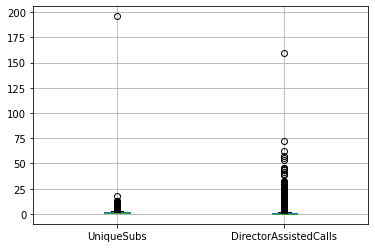

In [10]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [11]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
out_cols = ['UniqueSubs', 'DirectorAssistedCalls']
Q1 = cust_df[out_cols].quantile(.25)
Q3 = cust_df[out_cols].quantile(.75)
IQR = Q3 - Q1
cust_df = cust_df[~((cust_df[out_cols] < (Q1 - 1.5 * IQR)) |(cust_df[out_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

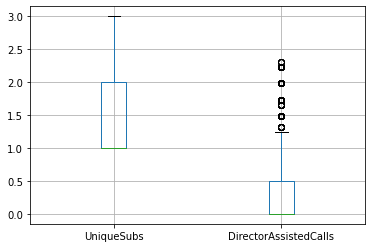

In [12]:
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

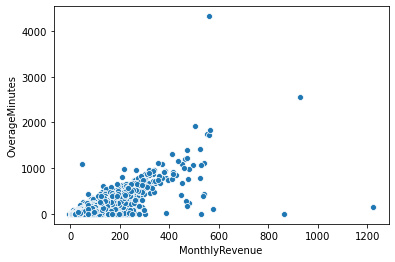

In [13]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

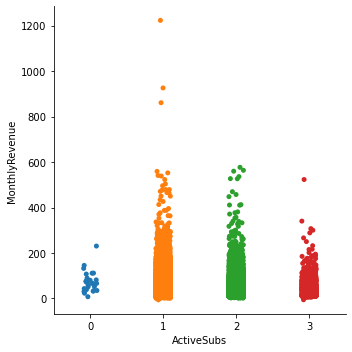

In [14]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs", y="MonthlyRevenue", data= cust_df) 

<mark>__Result:__
    
The Category plot clearly signifies that high active subscribers did not lead to low monthly revenues but higher revenues. 

### Q2.3 Does credit rating have an impact in churn rate?

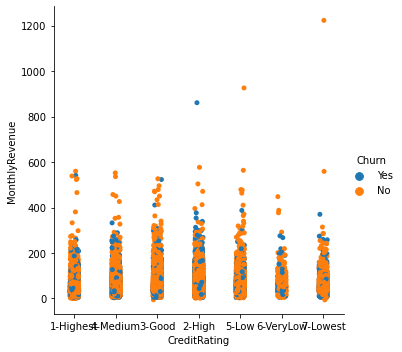

In [15]:
#use category plot to plot churn rate for each credit rating
sns.catplot(x="CreditRating", y="MonthlyRevenue", hue = 'Churn' ,data= cust_df) 

<mark>__Result:__
    
Based on the plot, we can infer that low credit ratings may lead to higher churn rate !

### Placeholder for additional exploratory analysis

<Figure size 1440x1440 with 0 Axes>

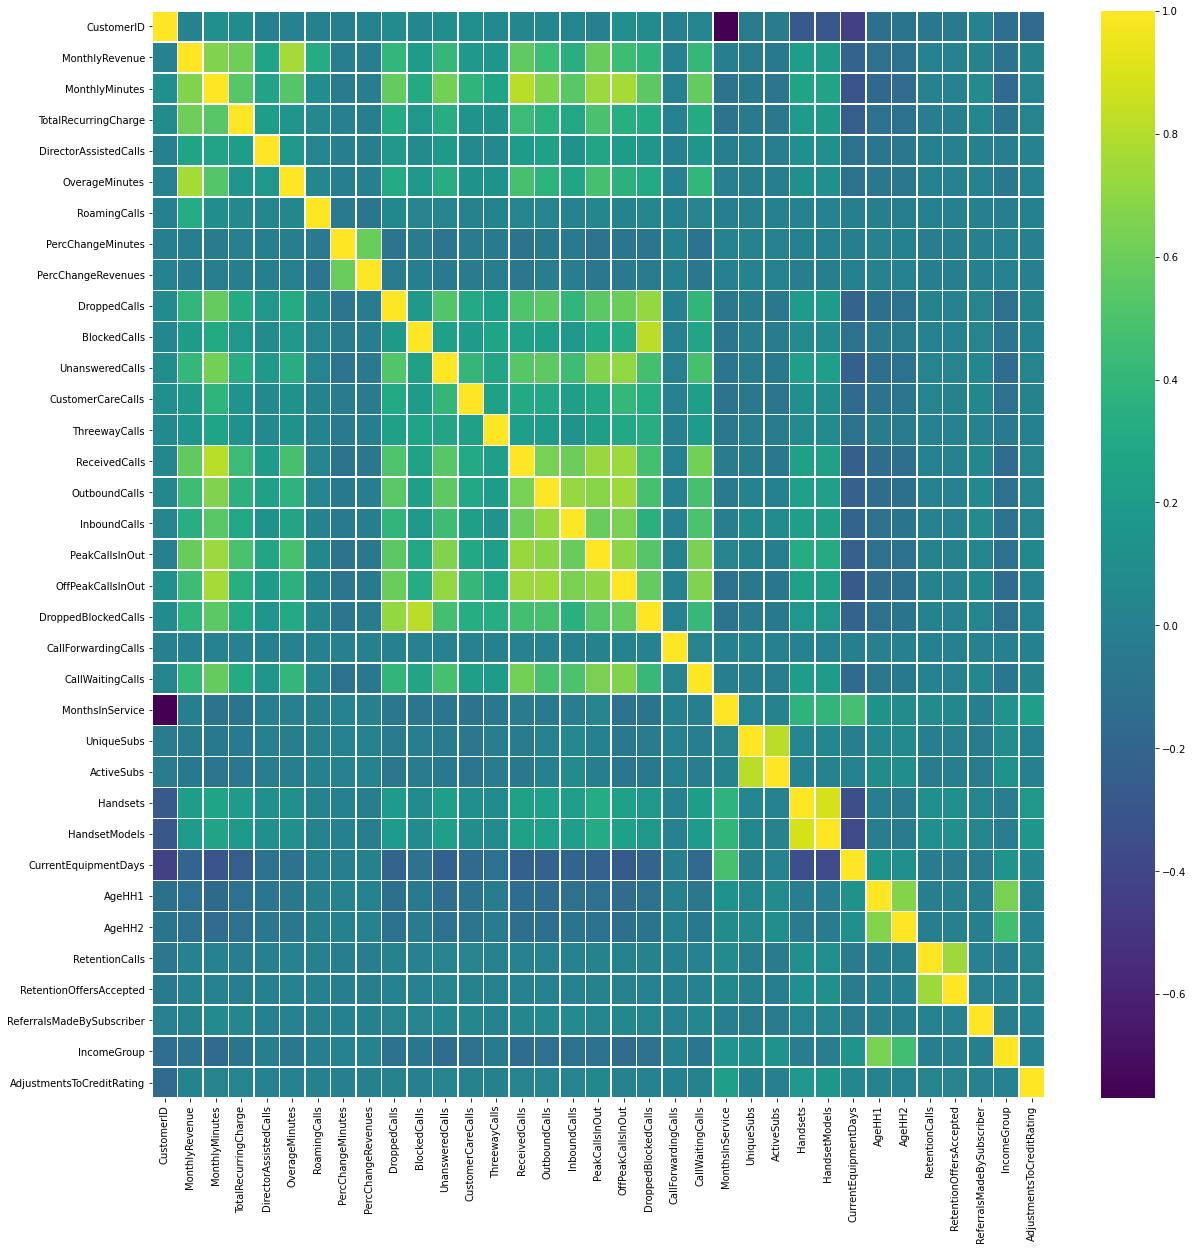

In [17]:
#type your code here for any additional exploratory analysis (if any)
plt.figure(figsize = (20, 20))
sns.heatmap(cust_df.corr(), linewidth = 0.5, annot = False, fmt = ".2f", cmap = 'viridis')

## Q3. Create additional features to help predict churn

In [18]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue'] 
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minutes'] = cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    
    return cust_df  


In [19]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [20]:
cust_df.isnull().sum()

CustomerID                 0
Churn                      0
MonthlyRevenue             0
MonthlyMinutes             0
TotalRecurringCharge       0
                        ... 
Occupation                 0
MaritalStatus              0
perc_active_subs           0
perc_recurrent_charge      0
perc_overage_minutes     633
Length: 61, dtype: int64

In [21]:
cust_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace = True)

In [22]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
X = cust_df.drop('Churn', axis = 1)
y = cust_df['Churn']

#Create dummy variables for all categorical variables
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [119]:
X.shape

(42156, 840)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [23]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver = 'liblinear', random_state = 0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [24]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
y_pred = classifier_logreg.predict(X_test)
y_pred

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
from sklearn.metrics import accuracy_score
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))

#Checking Overfitting and underfitting
print('Train Data Score: {}'.format(classifier_logreg.score(X_train, y_train)))
print('Test Data Score: {}'.format(classifier_logreg.score(X_test, y_test)))

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix

from sklearn.metrics import classification_report
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

Accuracy Score: 0.7116312168893809
Train Data Score: 0.7201870615744349
Test Data Score: 0.7116312168893809
              precision    recall  f1-score   support

          No       0.73      0.96      0.83      9141
         Yes       0.38      0.06      0.11      3506

    accuracy                           0.71     12647
   macro avg       0.55      0.51      0.47     12647
weighted avg       0.63      0.71      0.63     12647



### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [25]:
#-------------------------------- Model training -------------------------------#
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
#type your code to build random forest classifier model on training data set
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

y_pred = rfc.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Model accuracy score with 10 decision-trees : 0.7245
              precision    recall  f1-score   support

          No       0.73      0.99      0.84      9141
         Yes       0.56      0.03      0.06      3506

    accuracy                           0.72     12647
   macro avg       0.64      0.51      0.45     12647
weighted avg       0.68      0.72      0.62     12647



<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?

### Q4.3 Identify most important features impacting churn

Text(0, 0.5, 'Features')

Text(0.5, 0, 'Feature Importance')

Text(0.5, 1.0, 'Feature importances Based on Random Forest Model')

Text(0.5, 0, 'Impurity-based feature importances')

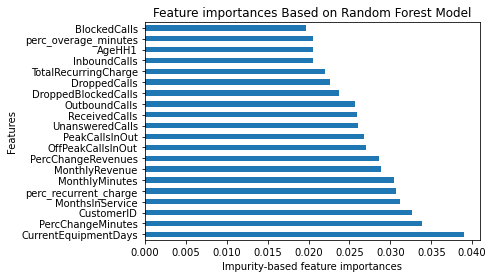

In [27]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created
feat_importances = pd.Series(rfc.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.ylabel('Features')
plt.xlabel('Feature Importance')
plt.title("Feature importances Based on Random Forest Model")
plt.xlabel('Impurity-based feature importances')
plt.show()